## The Sparks Foundation - Data Sciense & Business Analytics Internship
## Author - Pranit Ravindra Anap

### Batch - March 2022
# Task 6 -Prediction Using  Decision Tree Algorithm.
> ## Create the Decision Tree classifier for Iris dataset and visualize it graphically.
>> #### Statement : The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree, export_text

# Importing Data

In [2]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#Preparing the data
X=df.iloc[:,:-1]
y=df.species

In [5]:
#Splitting the data into training & test sets
X_train,Y_test,x_train,y_test=train_test_split(X,y,train_size=0.7)
print('X_train.shape:',X_train.shape)
print('Y_test.shape :', Y_test.shape)

X_train.shape: (105, 4)
Y_test.shape : (45, 4)


# Feature Scaling

In [6]:
scalar=MinMaxScaler().fit(X_train)
X_train=scalar.transform(X_train)
Y_test=scalar.transform(Y_test)

## Working of Decision Trees
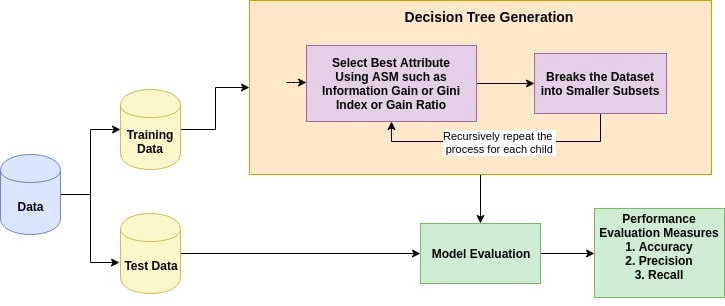
A decision tree in general parlance represents a hierarchical series of binary decisions
## Visualizing Decision Trees

<img src="https://i.imgur.com/qSH4lqz.png" width="480">

A decision tree in machine learning works in exactly the same way, and except that we let the computer figure out the optimal structure & hierarchy of decisions, instead of coming up with criteria manually.
## Training 
We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [7]:
model = DecisionTreeClassifier(random_state=42)  #replicate results
model.fit(X_train,x_train)

DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

In [17]:
# Let's check the depth of the tree that was created.
model.tree_.max_depth

6

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [8]:
test_preds=model.predict(Y_test)
pd.value_counts(test_preds)

virginica     19
versicolor    17
setosa         9
dtype: int64

The decision tree also returns probabilities for each prediction.

In [9]:
test_probs = model.predict_proba(Y_test)
test_probs

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [10]:
accuracy_score(y_test, test_preds)

0.9555555555555556

### Visualization

We can visualize the decision tree _learned_ from the training data.

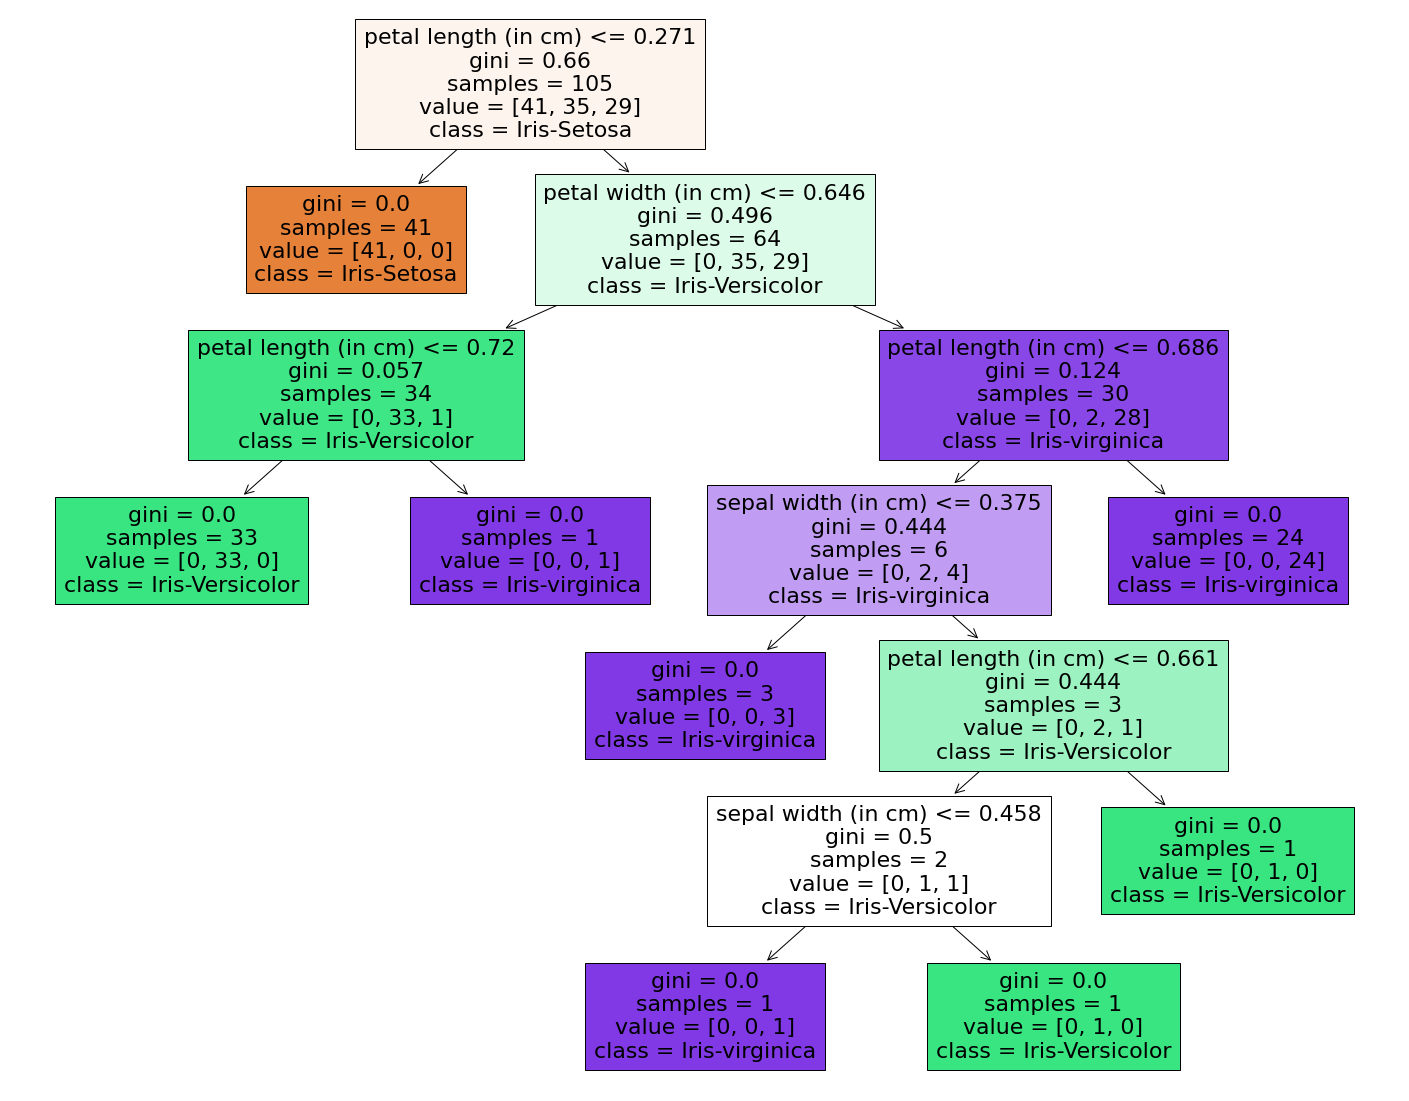

In [11]:
plt.figure(figsize=(25,20))
feature_Name=['sepal length ( in cm)','sepal width (in cm)','petal length (in cm)','petal width (in cm)']
class_Name=['Iris-Setosa','Iris-Versicolor','Iris-virginica']
plot_tree(model, feature_names=feature_Name,class_names=class_Name, filled=True);

We can also display the tree as text, which can be easier to follow for deeper trees.

In [12]:
tree_text = export_text(model, max_depth=10, feature_names=feature_Name)
print(tree_text[:5000])

|--- petal length (in cm) <= 0.27
|   |--- class: setosa
|--- petal length (in cm) >  0.27
|   |--- petal width (in cm) <= 0.65
|   |   |--- petal length (in cm) <= 0.72
|   |   |   |--- class: versicolor
|   |   |--- petal length (in cm) >  0.72
|   |   |   |--- class: virginica
|   |--- petal width (in cm) >  0.65
|   |   |--- petal length (in cm) <= 0.69
|   |   |   |--- sepal width (in cm) <= 0.38
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal width (in cm) >  0.38
|   |   |   |   |--- petal length (in cm) <= 0.66
|   |   |   |   |   |--- sepal width (in cm) <= 0.46
|   |   |   |   |   |   |--- class: virginica
|   |   |   |   |   |--- sepal width (in cm) >  0.46
|   |   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- petal length (in cm) >  0.66
|   |   |   |   |   |--- class: versicolor
|   |   |--- petal length (in cm) >  0.69
|   |   |   |--- class: virginica



# Feature Importance
Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [13]:
model.feature_importances_

array([0.        , 0.03366309, 0.5905956 , 0.37574131])

In [14]:
#Let's turn this into a dataframe and visualize the most important features.
importance_df = pd.DataFrame({
    'feature':feature_Name,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
2,petal length (in cm),0.590596
3,petal width (in cm),0.375741
1,sepal width (in cm),0.033663
0,sepal length ( in cm),0.000000


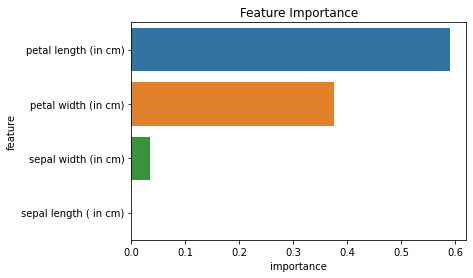

In [15]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

From above graph ,it is clear that 'petal length' is while classifying the flower.

You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.

Feeding new data to the model to predict its class

In [16]:
sepal_length=3.7
sepal_width=2.0
petal_length=0.5
petal_width=3.5
new_info = [[sepal_length,sepal_width,petal_length,petal_width]]
result=model.predict(new_info)
print(result)

['versicolor']
